In [1]:
# imports
import numpy as np
import pandas as pd
import datetime
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
# loading data
file_path = '../input/heart-disease-health-indicators-dataset/heart_disease_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

In [3]:
# setting parameters
n_epochs=40
batch_size=256
lr=0.01
conf=0.35

In [4]:
#removing duplicates
df = df.drop_duplicates()

In [5]:
# checking skewness of classes
df['HeartDiseaseorAttack']. value_counts()

0.0    206064
1.0     23717
Name: HeartDiseaseorAttack, dtype: int64

In [6]:
df_pos=df[df['HeartDiseaseorAttack']==1]
df_neg=df[df['HeartDiseaseorAttack']==0]

In [7]:
df_neg.shape

(206064, 22)

In [8]:
#sampling almost equal number rof test cases ensure skewness removal
df_neg=df_neg.sample(frac=0.1, replace=True, random_state=1)

In [9]:
df_neg.shape

(20606, 22)

In [10]:
df=pd.concat([df_pos, df_neg],ignore_index=True)

In [11]:
# shuffling
df = df.sample(frac = 1)

In [12]:
# separating the X and Y parts of dataset
y_df=df["HeartDiseaseorAttack"]
x_df = df.drop(['HeartDiseaseorAttack'], axis = 1)
x_df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
16730,0.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,10.0,5.0,8.0
43257,1.0,1.0,1.0,25.0,1.0,0.0,2.0,0.0,0.0,1.0,...,1.0,0.0,4.0,3.0,25.0,1.0,0.0,11.0,6.0,1.0
41665,1.0,1.0,1.0,35.0,1.0,0.0,2.0,1.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,1.0,11.0,4.0,5.0
43119,0.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,3.0,7.0,15.0,0.0,0.0,2.0,6.0,8.0
40982,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0


In [13]:
# columns that need to be normalised
cols=['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

In [14]:
# normalising
x_df[cols] = (x_df[cols] - x_df[cols].min())/ (x_df[cols].max()- x_df[cols].min())

In [15]:
x_df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
16730,0.0,0.0,1.0,0.220930,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.50,0.000000,0.000000,0.0,1.0,0.750000,0.8,1.000000
43257,1.0,1.0,1.0,0.151163,1.0,0.0,2.0,0.0,0.0,1.0,...,1.0,0.0,0.75,0.100000,0.833333,1.0,0.0,0.833333,1.0,0.000000
41665,1.0,1.0,1.0,0.267442,1.0,0.0,2.0,1.0,0.0,0.0,...,1.0,0.0,1.00,0.000000,1.000000,1.0,1.0,0.833333,0.6,0.571429
43119,0.0,0.0,1.0,0.139535,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.50,0.233333,0.500000,0.0,0.0,0.083333,1.0,1.000000
40982,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.00,0.000000,0.000000,0.0,1.0,1.000000,1.0,1.000000


In [16]:
# converting to numpy arrays
x_train = x_df.to_numpy()
y_train = y_df.to_numpy()

In [17]:
# trrain-val-test split
x_train, x_test, y_train, y_test = train_test_split( x_train, y_train, test_size=0.15, random_state=42)
x_train, x_val, y_train, y_val = train_test_split( x_train, y_train, test_size=0.20, random_state=42)

In [18]:
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)
y_val = y_val.reshape(y_val.shape[0],1)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(30139, 21)
(30139, 1)
(6649, 21)
(6649, 1)
(7535, 21)
(7535, 1)


In [20]:
# building the mdodel
model=Sequential()
model.add(Dense(x_train.shape[0],input_dim=x_train.shape[1],activation='relu')) # input layer
model.add(Dense(128,activation='relu')) # hidden layers
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # sigmoid output

2022-03-03 04:45:57.443156: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-03 04:45:57.553804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-03 04:45:57.554521: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-03 04:45:57.555912: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [21]:
# setting up the learning scheduler
initial_learning_rate =lr
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=n_epochs,
    decay_rate=0.96,
    staircase=True)

In [22]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule), metrics=[tf.keras.metrics.BinaryAccuracy(threshold=conf),tf.keras.metrics.Recall()])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30139)             663058    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3857920   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 4,587,027
Trainable params: 4,587,027
Non-trainable params: 0
_________________________________________________________________


In [24]:
# training
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

H=model.fit(x=x_train, 
          y=y_train, 
          epochs=n_epochs, 
          batch_size=batch_size,
          validation_data=(x_val, y_val), 
#           class_weight={0:1,1:9}
          callbacks=[tensorboard_callback])

2022-03-03 04:46:00.184091: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-03-03 04:46:00.184138: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-03-03 04:46:00.186065: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-03-03 04:46:00.433064: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-03-03 04:46:00.433241: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-03-03 04:46:00.669628: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
  2/118 [..............................] - ETA: 22s - loss: 0.6921 - binary_accuracy: 0.5605 - recall: 0.9791 

2022-03-03 04:46:02.225645: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-03-03 04:46:02.225704: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-03-03 04:46:02.403266: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-03-03 04:46:02.403693: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


 21/118 [====>.........................] - ETA: 2s - loss: 0.6897 - binary_accuracy: 0.5353 - recall: 0.9976

2022-03-03 04:46:02.538042: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 140 callback api events and 136 activity events. 
2022-03-03 04:46:02.544299: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-03-03 04:46:02.557753: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20220303-044600/train/plugins/profile/2022_03_03_04_46_02

2022-03-03 04:46:02.561450: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/20220303-044600/train/plugins/profile/2022_03_03_04_46_02/b522fcfbcb4a.trace.json.gz
2022-03-03 04:46:02.578271: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20220303-044600/train/plugins/profile/2022_03_03_04_46_02

2022-03-03 04:46:02.579714: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to lo

118/118 [==============================] - 3s 12ms/step - loss: 0.6792 - binary_accuracy: 0.5339 - recall: 0.9959 - val_loss: 0.6661 - val_binary_accuracy: 0.5407 - val_recall: 0.9747
Epoch 2/40
118/118 [==============================] - 1s 6ms/step - loss: 0.6534 - binary_accuracy: 0.5339 - recall: 0.9553 - val_loss: 0.6400 - val_binary_accuracy: 0.5407 - val_recall: 0.9219
Epoch 3/40
118/118 [==============================] - 1s 7ms/step - loss: 0.6278 - binary_accuracy: 0.5339 - recall: 0.9083 - val_loss: 0.6159 - val_binary_accuracy: 0.5407 - val_recall: 0.8814
Epoch 4/40
118/118 [==============================] - 1s 7ms/step - loss: 0.6054 - binary_accuracy: 0.5339 - recall: 0.8709 - val_loss: 0.5960 - val_binary_accuracy: 0.5407 - val_recall: 0.8527
Epoch 5/40
118/118 [==============================] - 1s 7ms/step - loss: 0.5872 - binary_accuracy: 0.5385 - recall: 0.8507 - val_loss: 0.5805 - val_binary_accuracy: 0.5823 - val_recall: 0.8191
Epoch 6/40
118/118 [====================

In [25]:
# Evaluation
loss, accuracy, recall = model.evaluate(x_test, y_test)
print('Loss: %.2f' % (loss))
print('Accuracy: %.2f' % (accuracy*100))
print('Recall: %.2f' % (recall))

208/208 [==============================] - 1s 2ms/step - loss: 0.5238 - binary_accuracy: 0.7305 - recall: 0.8015
Loss: 0.52
Accuracy: 73.05
Recall: 0.80


Evaluating network...


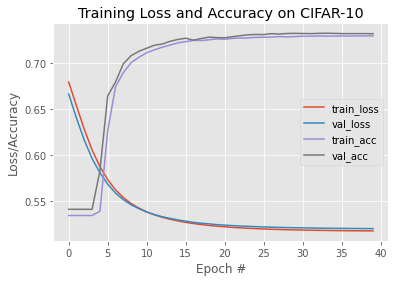

In [26]:
# evaluating and visual analysis of performance
print("Evaluating network...")
predictions = model.predict(x=x_test, batch_size=128)
# plot the training loss and accuracy
N = np.arange(0, n_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["binary_accuracy"], label="train_acc")
plt.plot(N, H.history["val_binary_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()